In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
import pandas as pd

# Reading Tables from HTML Strings

In [3]:
html = '''
<table>
    <thead>
        <tr>
            <th>Sequence</th>
            <th>Country</th>
            <th>Population</th>
            <th>Updated</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>China</td>
            <td>1,439,323,776</td>
            <td>1-Dec-2020</td>
        </tr>
        <tr>
            <td>2</td>
            <td>India</td>
            <td>1,380,004,385</td>
            <td>1-Dec-2020</td>
        </tr>
        <tr>
            <td>3</td>
            <td>United States</td>
            <td>331,002,651</td>
            <td>1-Dec-2020</td>
        </tr>
    </tbody>
</table>
'''

In [4]:
df_list = pd.read_html(html)

In [5]:
len(df_list)

1

In [6]:
df_list[0]

,Sequence,Country,Population,Updated
0,1,China,1439323776,1-Dec-2020
1,2,India,1380004385,1-Dec-2020
2,3,United States,331002651,1-Dec-2020


In [7]:
population = df_list[0].set_index('Sequence')
population

,Country,Population,Updated
Sequence,,,
1,China,1439323776,1-Dec-2020
2,India,1380004385,1-Dec-2020
3,United States,331002651,1-Dec-2020


In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Population  3 non-null      int64 
 2   Updated     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 96.0+ bytes


## Parsing Dates

In [9]:
df_list= pd.read_html(html,parse_dates=['Updated'],index_col=0)
population=df_list[0]
population

,Country,Population,Updated
Sequence,,,
1,China,1439323776,2020-12-01
2,India,1380004385,2020-12-01
3,United States,331002651,2020-12-01


In [10]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     3 non-null      object        
 1   Population  3 non-null      int64         
 2   Updated     3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 96.0+ bytes


## HTML without Header

In [11]:
html_no_head = '''
<table>
    <tr>
        <td>Sequence</td>
        <td>Country</td>
        <td>Population</td>
        <td>Updated</td>
    </tr>
    <tr>
        <td>1</td>
        <td>China</td>
        <td>1,439,323,776</td>
        <td>1-Dec-2020</td>
    </tr>
    <tr>
        <td>2</td>
        
       
    </tr>
    <tr>
        <td>3</td>
        <td>United States</td>
        <td>331,002,651</td>
        <td>1-Dec-2020</td>
    </tr>
</table>
'''

In [12]:
pd.read_html(html_no_head,header=0, index_col=[0])[0]

,Country,Population,Updated
Sequence,,,
1,China,1.439324e+09,1-Dec-2020
2,NaN,NaN,NaN
3,United States,3.310027e+08,1-Dec-2020


# Reading HTML Files

In [13]:
population_file= pd.read_html("population.html",parse_dates=['Updated'],index_col=0)
population_file[0]

,Country,Population,Updated
Sequence,,,
1,China,1439323776,2020-12-01
2,India,1380004385,2020-12-01
3,United States,331002651,2020-12-01


# Extracting HTML tables from URLs

In [14]:
list_of_df = pd.read_html("https://en.wikipedia.org/wiki/Science_Fiction:_The_100_Best_Novels")

In [15]:
len(list_of_df)

8

## Filtering using `class`

In [16]:
 list_of_df = pd.read_html("https://en.wikipedia.org/wiki/Science_Fiction:_The_100_Best_Novels",
                    attrs={'class':"wikitable"})

In [17]:
len(list_of_df)

1

## Filtering with match

In [18]:
list_of_df = pd.read_html("https://en.wikipedia.org/wiki/Science_Fiction:_The_100_Best_Novels",
                    match='Nineteen Eighty-Four')

In [19]:
df_books = list_of_df[0]
df_books

,Title,Author,Published
0,Nineteen Eighty-Four,George Orwell,1949
1,Earth Abides,George R. Stewart,1949
2,The Martian Chronicles,Ray Bradbury,1950
3,The Puppet Masters,Robert A. Heinlein,1951
4,The Day of the Triffids,John Wyndham,1951
...,...,...,...
95,The Unreasoning Mask,Philip José Farmer,1981
96,Oath of Fealty,Larry Niven and Jerry Pournelle,1981
97,No Enemy But Time,Michael Bishop,1982
98,The Birth of the People's Republic of Antarctica,John Calvin Batchelor,1983


# Analyzing and visualizing scraped data

In [20]:
book_count = df_books.value_counts(subset=['Author']) #Default is descending
book_count

Author               
Philip K. Dick           6
J. G. Ballard            4
Robert A. Heinlein       3
Brian Aldiss             3
Thomas M. Disch          3
                        ..
John Calvin Batchelor    1
John Christopher         1
John Crowley             1
John Varley              1
Wilson Tucker            1
Length: 73, dtype: int64

In [21]:
df_book_count = book_count.reset_index(name='BookCount')
df_book_count

,Author,BookCount
0,Philip K. Dick,6
1,J. G. Ballard,4
2,Robert A. Heinlein,3
3,Brian Aldiss,3
4,Thomas M. Disch,3
...,...,...
68,John Calvin Batchelor,1
69,John Christopher,1
70,John Crowley,1
71,John Varley,1


In [22]:
df_book_count = df_books.value_counts(subset=['Author']).reset_index(name='BookCount')
df_book_count

,Author,BookCount
0,Philip K. Dick,6
1,J. G. Ballard,4
2,Robert A. Heinlein,3
3,Brian Aldiss,3
4,Thomas M. Disch,3
...,...,...
68,John Calvin Batchelor,1
69,John Christopher,1
70,John Crowley,1
71,John Varley,1


In [23]:
df_book_count[df_book_count['BookCount'] >= 3]

,Author,BookCount
0,Philip K. Dick,6
1,J. G. Ballard,4
2,Robert A. Heinlein,3
3,Brian Aldiss,3
4,Thomas M. Disch,3


In [24]:
top_df = df_book_count[df_book_count['BookCount'] >= 3]

# Plotting 

In [25]:
!pip install matplotlib

  Using cached matplotlib-3.6.1-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)


<AxesSubplot: ylabel='Author'>

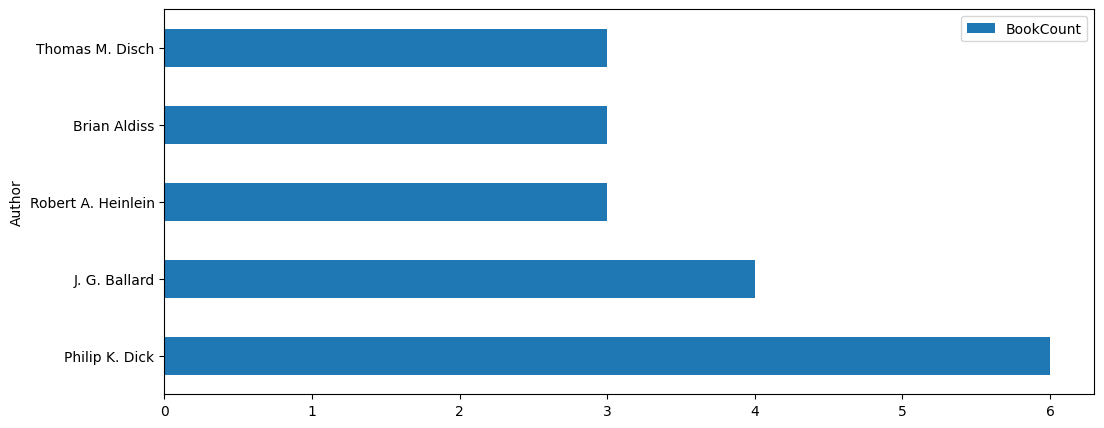

In [26]:
top_df.plot.barh(x='Author',y='BookCount',figsize=(12,5))